Market Data Analysis:
Segment: Low, Count: 600, Probability: 0.60
Segment: Medium, Count: 300, Probability: 0.30
Segment: High, Count: 100, Probability: 0.10
Total Changes: 1000

Cross-Entropy: 0.9210
KL Divergence: 0.0231


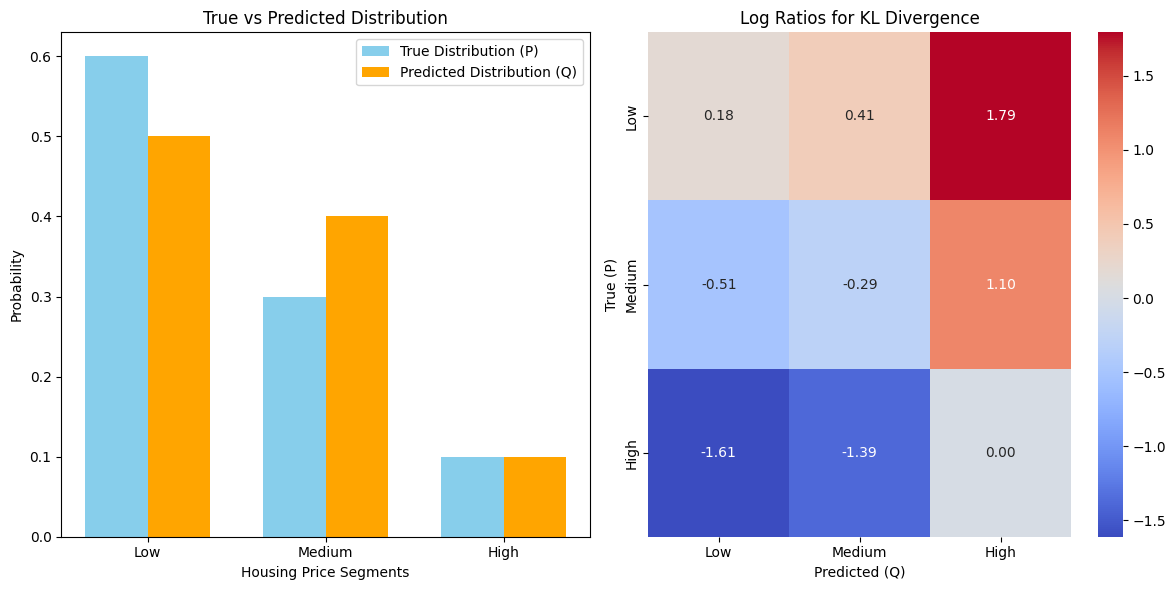

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Example market data: number of price changes observed in each segment
market_data = {"Low": 600, "Medium": 300, "High": 100}  # Example: counts of changes in each segment

total_changes = sum(market_data.values())

# Calculate probabilities based on market data
true_distribution = np.array([
    market_data["Low"] / total_changes,
    market_data["Medium"] / total_changes,
    market_data["High"] / total_changes
])

# Analyze the market
print("Market Data Analysis:")
for segment, count in market_data.items():
    probability = count / total_changes
    print(f"Segment: {segment}, Count: {count}, Probability: {probability:.2f}")

print(f"Total Changes: {total_changes}\n")

# Predicted distribution (Q) from the model
predicted_distribution = np.array([0.5, 0.4, 0.1])

# Function to calculate cross-entropy
def cross_entropy(p, q):
    return -np.sum(p * np.log(q))

# Function to calculate KL divergence
def kl_divergence(p, q):
    return np.sum(p * np.log(p / q))

# Calculate cross-entropy and KL divergence
ce = cross_entropy(true_distribution, predicted_distribution)
kl = kl_divergence(true_distribution, predicted_distribution)

# Print the results
print(f"Cross-Entropy: {ce:.4f}")
print(f"KL Divergence: {kl:.4f}")

# Visualization of distributions
x_labels = ["Low", "Medium", "High"]

plt.figure(figsize=(12, 6))

# Bar plot for distributions
plt.subplot(1, 2, 1)
x = np.arange(len(x_labels))
width = 0.35

plt.bar(x - width/2, true_distribution, width, label="True Distribution (P)", color="skyblue")
plt.bar(x + width/2, predicted_distribution, width, label="Predicted Distribution (Q)", color="orange")
plt.xticks(x, x_labels)
plt.title("True vs Predicted Distribution")
plt.xlabel("Housing Price Segments")
plt.ylabel("Probability")
plt.legend()

# Heatmap for KL Divergence visualization
plt.subplot(1, 2, 2)
heatmap_data = np.outer(true_distribution, 1 / predicted_distribution)
sns.heatmap(np.log(heatmap_data), annot=True, fmt=".2f", cmap="coolwarm", xticklabels=x_labels, yticklabels=x_labels)
plt.title("Log Ratios for KL Divergence")
plt.xlabel("Predicted (Q)")
plt.ylabel("True (P)")

plt.tight_layout()
plt.show()

# Comments
# 1. The bar plot compares the true and predicted distributions, highlighting the differences.
# 2. The heatmap shows the log of ratios (P[i] / Q[i]) used in KL divergence calculations.
